In [1]:
import pandas as pd
import requests as req
from io import BytesIO

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
url_1 = 'data/raw/yellow_tripdata_2023-01.parquet'
url_2 = 'data/raw/yellow_tripdata_2023-02.parquet'
df = pd.read_parquet(url_1)

In [5]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [6]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [7]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

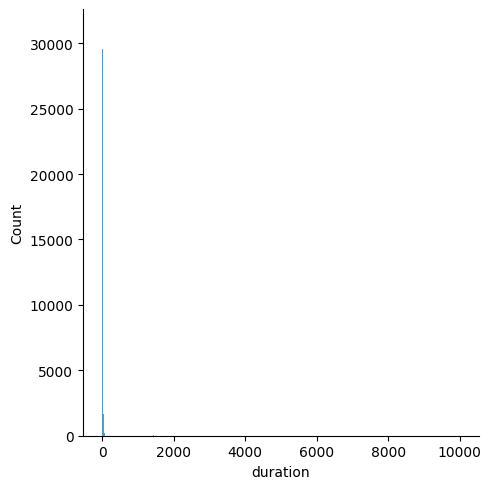

In [8]:
sns.displot(df.duration)

In [9]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [10]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9812202822125979

In [11]:
df = df[((df.duration >= 1) & (df.duration <= 60))]

In [12]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [13]:
df[categorical] = df[categorical].astype(str)

In [14]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [15]:
df[categorical + numerical].iloc[:10]

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
1,43,237,1.10
2,48,238,2.51
3,138,7,1.90
4,107,79,1.43
5,161,137,1.84
6,239,143,1.66
7,142,200,11.70
8,164,236,2.95
9,141,107,3.01


In [ ]:
dv = DictVectorizer()